<a href="https://colab.research.google.com/github/Gh0st116/Neural-networks/blob/main/rede_cosseno_ruido.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

xtreinamento= (160, 30)


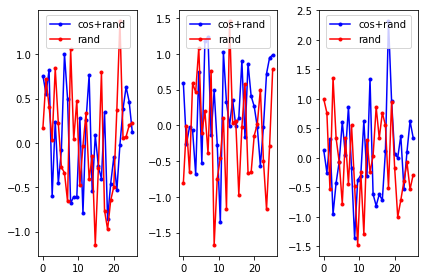

In [ ]:
# Cria o dataset e salva em "meu_sata_set.h5"

# Manipulacao de vetores dos dados
import numpy as np

# Fazer graficos dos resultados e loss
import matplotlib.pyplot as plt

# Salvar e carregar o dataset em um arquivo
import h5py


# Quantidade de pontos dos dados de entrada
s_p = 30

# Quantidade de exemplos de cada tipo tem nos dados de treinamento
s_d = 80

# Quantidade exemplos de cada tipo tem para teste
s_t = 10

# Porcentagem ruido cossenos
p_r = 0.7


# Define a escala de tempo como entre >= 0 e <= 8pi
t = np.linspace(0, 8 * 3.15, s_p)


# Dados de treinamento
# Criando matriz cheia de zeros com 2.s_d linhas e s_p colunas
x = np.zeros([2 * s_d, s_p])

x[0:s_d, 0:s_p] = (1 - p_r) * np.ones([s_d, 1]) * np.cos(t)
x[0:s_d, 0:s_p] = x[0:s_d, 0:s_p] + p_r * np.random.normal(0, 0.8, [s_d, s_p])
x[s_d:2 * s_d, 0:s_p] = np.random.normal(0, 0.7, [s_d, s_p])
y = np.zeros([2 * s_d, 1])
y[0:s_d] = np.ones([s_d, 1])


# Dados de teste
x_t = np.zeros([2 * s_t, s_p])
x_t[0:s_t, 0:s_p] = (1 - p_r) * np.ones([s_t, 1]) * np.cos(t)
x_t[0:s_t, 0:s_p] = x_t[0:s_t, 0:s_p] + p_r * np.random.normal(0, 0.8, [s_t, s_p])
x_t[s_t:2 * s_t, 0:s_p] = np.random.normal(0, 0.7, [s_t, s_p])
y_t = np.zeros([2 * s_t, 1])
y_t[0:s_t] = np.ones([s_t, 1])


#mostra alguns dados de treinamento
plt.figure()

for nn in range(0,3):
  plt.subplot(1, 3, nn + 1)
  plt.plot(t, x[nn,:], 'b.-', label='cos+rand')
  plt.plot(t, x[s_d + nn, :], 'r.-', label='rand')
  plt.legend(loc='upper center')

plt.tight_layout()


# salva o dataset
with h5py.File('meu_data_set.h5', 'w') as hf:
    hf.create_dataset("tempo", data=t)
    hf.create_dataset("xtreinamento", data=x)
    hf.create_dataset("ytreinamento", data=y)
    hf.create_dataset("xteste", data=x_t)
    hf.create_dataset("yteste", data=y_t)
    hf.create_dataset("data_info", data=[s_p, s_d, s_t])

print('xtreinamento=', x.shape)

dados do arquivo:  ['data_info', 'tempo', 'xteste', 'xtreinamento', 'yteste', 'ytreinamento']
numero de exemplos de treinamento: 160
numero de exemplos de teste: 20
Model: "rede_IF_02"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 12)                372       
                                                                 
 dense_1 (Dense)             (None, 8)                 104       
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 485
Trainable params: 485
Non-trainable params: 0
_________________________________________________________________
None


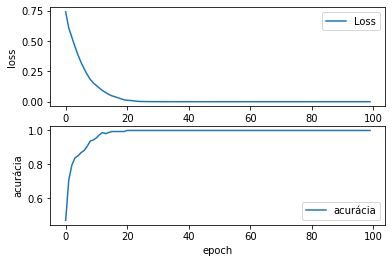

1/1 [==============================] - 0s 152ms/step - loss: 2.3172 - accuracy: 0.9000
Accuracy: 90.00
data pred = [[1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 1.]
 [1. 0.]
 [1. 1.]
 [0. 0.]
 [0. 0.]
 [0. 1.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]
 [0. 0.]]


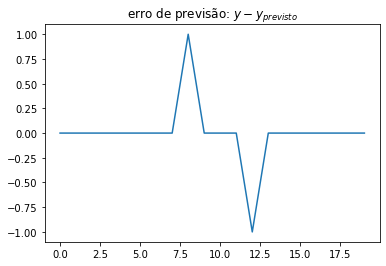

In [ ]:
# Carrega do dataset de "meu_data_set.h5" com opção de psd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import h5py

# Abrindo o arquivo para ler
with h5py.File('meu_data_set.h5', 'r') as hf:
    print('dados do arquivo: ', list(hf.keys()))
    [s_p,s_d,s_t] = hf['data_info'][:]
    y_train = hf['ytreinamento'][:]
    y_test = hf['yteste'][:]
    x_train = hf['xtreinamento'][:]
    x_test = hf['xteste'][:]
print('numero de exemplos de treinamento:', 2 * s_d)
print('numero de exemplos de teste:', 2 * s_t)

# https://machinelearningmastery.com/tutorial-first-neural-network-python-keras/
# Cria e treina a rede neural
# Define a rede neural "keras model"
# Criacao da rede neural
model = tf.keras.Sequential(name='rede_IF_02')

# Definicao das camadas da rede
model.add(tf.keras.layers.Dense(12, input_dim=s_p, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compila a rede neural
opt = tf.keras.optimizers.Adam(learning_rate=0.05)

# Definindo a funcao loss e otimizador
model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])

# Printa um resumo da rede
print(model.summary())

# Treina a rede neural com o data set
history = model.fit(x_train, y_train, batch_size=2 * s_d, epochs=100, verbose=0)

# Mostra o loss e a acuracia durante o treinamento
plt.figure()
plt.subplot(2, 1, 1)
plt.plot(history.history['loss'])
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Loss'], loc='upper right')
plt.subplot(2, 1, 2)
plt.plot(history.history['accuracy'])
plt.ylabel('acurácia')
plt.xlabel('epoch')
plt.legend(['acurácia'], loc='lower right')
plt.show()

# Faz previsões com a rede treinada
y_pred = model.predict(x_test)

# Calcula a accurácia do teste
_, accuracy = model.evaluate(x_test, y_test)
print('Accuracy: %.2f' % (accuracy * 100))

# Mostra os resultados esperados e os alcançados lado a lado
print('data pred =', np.concatenate((y_test, np.around(y_pred)), axis=1))

# Faz o gráfico do erro de previsão
plt.figure()
plt.plot(y_test - np.around(y_pred))
plt.title('erro de previsão: $y-y_{previsto}$')
plt.show()